In [1]:
%matplotlib inline

import json
import pandas as pd
import numpy as np

import sys
import os
sys.path.append(os.path.abspath('../'))
from utils import results_heatmap
from dataset import SNPmarkersDataset

In [2]:
phenotypes = list(SNPmarkersDataset(mode='validation', skip_check=True, dir_path="../../Data/").phenotypes.keys())

# Run reasonning
Only the phenotype "ep_res" will be used as the process of running the models is very long due to the more than quadratic complextity of the model with the number of sample. Note that the json file was generated from the .log file due to a mistake in the script (results were valid, the error occured when writing the values in the json file). The reasoning behind the hyperparameter choice is explained below. Note that the number of runs made was planned depending on my schedule to minimize the idle time. 

1. Inital exploration of the hyperparameter space in order to define more precise runs in the future
2. Exploration of the region gamma $\in$ [1e-4, 1e-5] and c $\in$ [1, 10] (this region was the most probable place for the minimum)
3. Trying to expend futher than the lower bound of the previous run with using the same interval than in the second run to ease the interpretation in the heatmaps (ie the decrease of gamma is 2.25e-5 in the parameter range)
4. Continue the expension started in the thrid run but a mistake made values incoherant (Starting from 1.45e-4, I took 1.45-4 as spacing between two runs instead of starting at 1.225e-4 with a spacing of 2.25e-5 as it should be).
5. Discover the error in the forth run with the summary heatmap, set correctly the range to start from 1.225e-4 with the spacing at 2.25e-5 as it should have been in the forth run.

 # Graph of every individual run
 Display one heat map for every run made with the SVM model. A summary (all runs in a single heatmap) is available after this section.

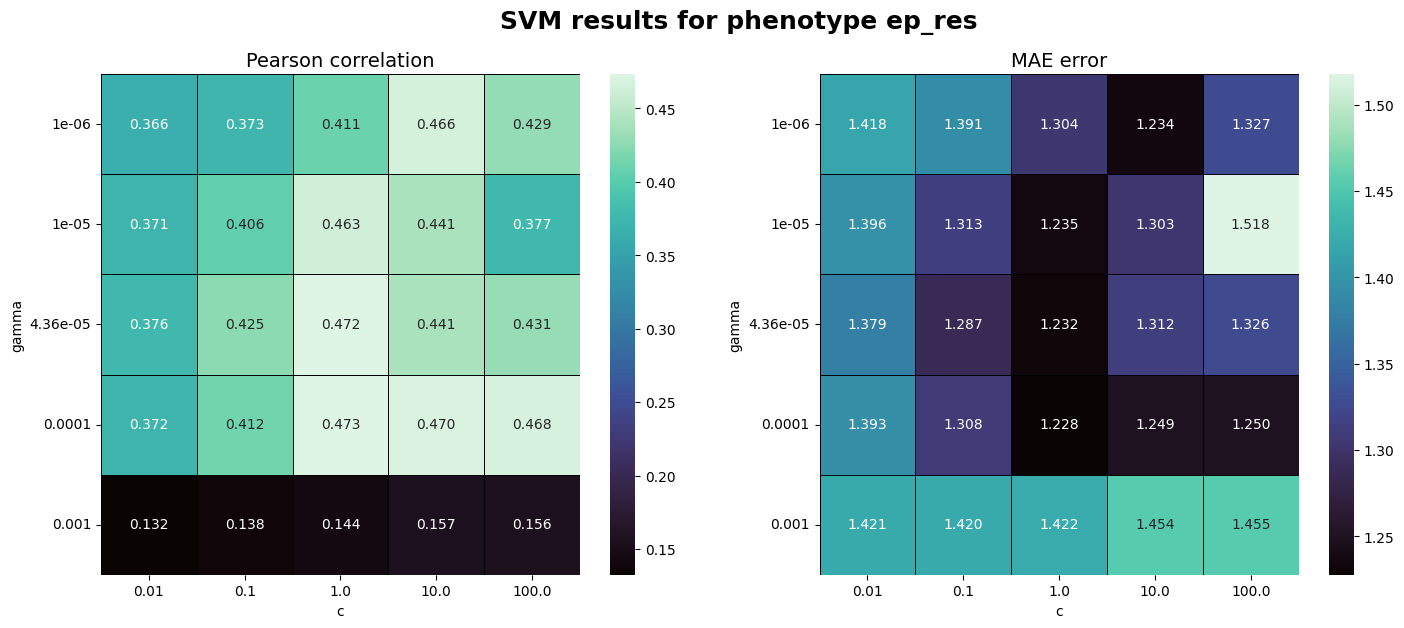

In [3]:
for phenotype in phenotypes:
    with open(f"../Results/SVM_{phenotype}.json", "r") as f:
        results = json.load(f)
        # Convert in float to sort correctly the axis afterward
        results["dim_0_values"] = [float(f"{x:.2e}") for x in results["dim_0_values"]]
        corr_df = pd.DataFrame(np.array(results["correlation"]), index= results["dim_0_values"], columns= results["dim_1_values"]).sort_index()
        MAE_df = pd.DataFrame(np.array(results["MAE"]), index= results["dim_0_values"], columns= results["dim_1_values"]).sort_index()
        results_heatmap(corr_df, MAE_df, f"SVM results for phenotype {phenotype}", "Pearson correlation", "MAE error", results["dim_1_label"],  results["dim_0_label"])
        break

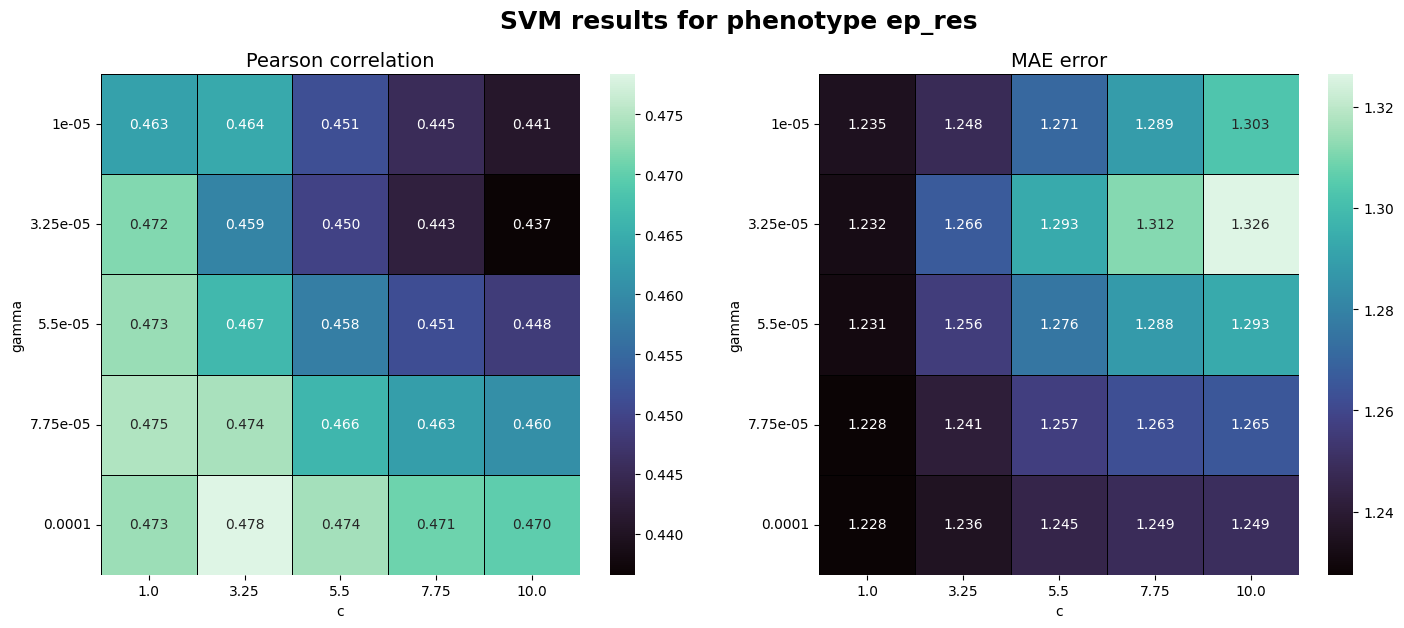

In [4]:
for phenotype in phenotypes:
    with open(f"../Results/SVM_2_{phenotype}.json", "r") as f:
        results = json.load(f)
        # Convert in float to sort correctly the axis afterward
        results["dim_0_values"] = [float(f"{x:.2e}") for x in results["dim_0_values"]]
        corr_df = pd.DataFrame(np.array(results["correlation"]), index= results["dim_0_values"], columns= results["dim_1_values"]).sort_index()
        MAE_df = pd.DataFrame(np.array(results["MAE"]), index= results["dim_0_values"], columns= results["dim_1_values"]).sort_index()
        results_heatmap(corr_df, MAE_df, f"SVM results for phenotype {phenotype}", "Pearson correlation", "MAE error", results["dim_1_label"],  results["dim_0_label"])
        break

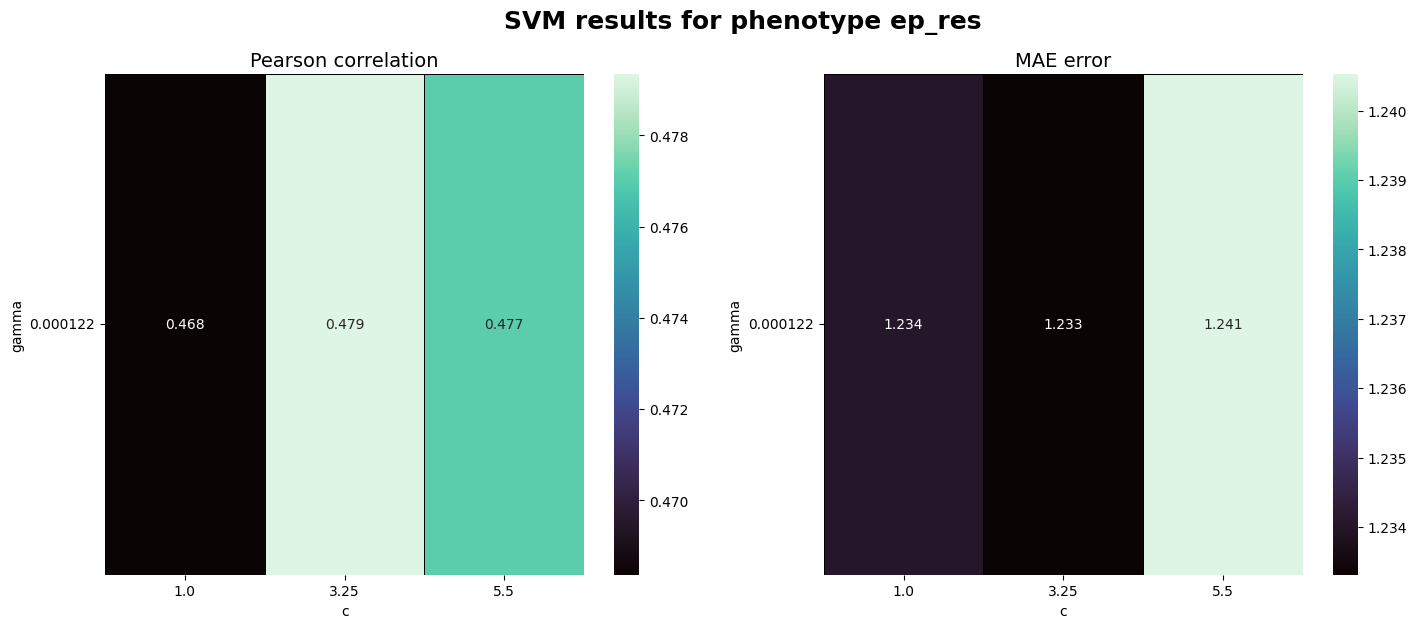

In [5]:
for phenotype in phenotypes:
    with open(f"../Results/SVM_3_{phenotype}.json", "r") as f:
        results = json.load(f)
        # Convert in float to sort correctly the axis afterward
        results["dim_0_values"] = [float(f"{x:.2e}") for x in results["dim_0_values"]]
        corr_df = pd.DataFrame(np.array(results["correlation"]), index= results["dim_0_values"], columns= results["dim_1_values"])
        MAE_df = pd.DataFrame(np.array(results["MAE"]), index= results["dim_0_values"], columns= results["dim_1_values"])
        results_heatmap(corr_df, MAE_df, f"SVM results for phenotype {phenotype}", "Pearson correlation", "MAE error", results["dim_1_label"],  results["dim_0_label"])
        break

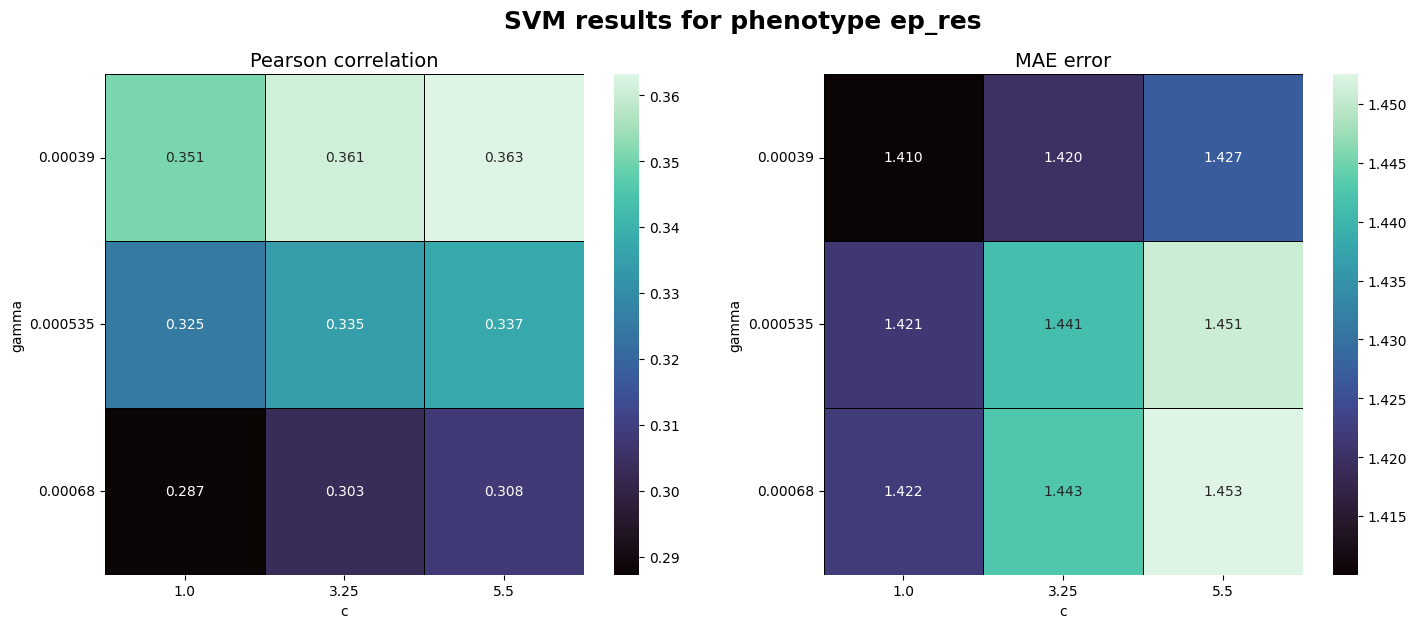

In [14]:
for phenotype in phenotypes:
    with open(f"../Results/SVM_4_{phenotype}.json", "r") as f:
        results = json.load(f)
        # Convert in float to sort correctly the axis afterward
        results["dim_0_values"] = [float(f"{x:.2e}") for x in results["dim_0_values"]]
        corr_df = pd.DataFrame(np.array(results["correlation"]), index= results["dim_0_values"], columns= results["dim_1_values"])
        MAE_df = pd.DataFrame(np.array(results["MAE"]), index= results["dim_0_values"], columns= results["dim_1_values"])
        results_heatmap(corr_df, MAE_df, f"SVM results for phenotype {phenotype}", "Pearson correlation", "MAE error", results["dim_1_label"],  results["dim_0_label"])
        break

# Summary of the runs
Display all results obtained in a single heatmap in order to better understand the behaviour of the model depending on the hyper parameter (behalve the forth run as the parameter range wasn't coherant):

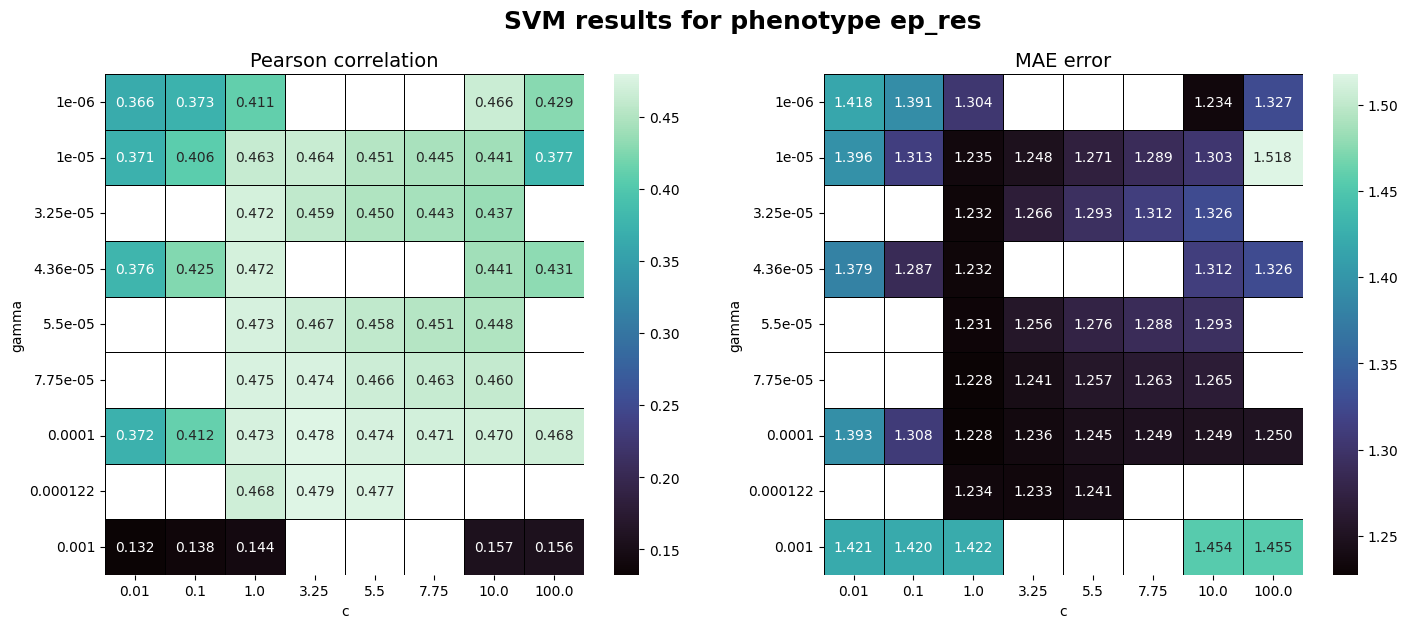

In [ ]:
for phenotype in phenotypes:
    corr = []
    MAE = []
    index = []
    col = []
    for i in range(1,5):
        if i == 1:
            filename = f"../Results/SVM_{phenotype}.json"
        # Don't display the value of the forth run as the wrong parameter range
        elif i==4:
            continue
        else:
            filename = f"../Results/SVM_{i}_{phenotype}.json"
        
        with open(filename, "r") as f:
            results = json.load(f)
            
            results["dim_0_values"] = [float(f"{x:.2e}") for x in results["dim_0_values"]]
            
            corr.append(pd.DataFrame(np.array(results["correlation"]), index= results["dim_0_values"], columns= results["dim_1_values"]))
            MAE.append(pd.DataFrame(np.array(results["MAE"]), index= results["dim_0_values"], columns= results["dim_1_values"]))
            index += results["dim_0_values"]
            col += results["dim_1_values"]
    
    corr_df = pd.DataFrame(np.nan, index = sorted(list(set(index))), columns=sorted(list(set(col))))
    MAE_df = pd.DataFrame(np.nan, index = sorted(list(set(index))), columns=sorted(list(set(col))))
    
    for df in corr:
        corr_df.fillna(df, inplace=True)
    
    for df in MAE:
        MAE_df.fillna(df, inplace=True)
    
    results_heatmap(corr_df, MAE_df, f"SVM results for phenotype {phenotype}", "Pearson correlation", "MAE error", results["dim_1_label"],  results["dim_0_label"])
    break